# 1. Aplicación paso a paso del modelo de Árbol de decisión
## ¿Qué es un Árbol de Decisión?

Imagina un juego de "Adivina Quién" o un diagrama de flujo simple que usas para tomar una decisión. ¡Eso es básicamente un Árbol de Decisión en el mundo del aprendizaje automático!

Es un modelo de Machine Learning que, como su nombre indica, usa una estructura de árbol para tomar decisiones. Piensa en él como una serie de preguntas que el modelo se hace a sí mismo sobre tus datos, hasta que puede llegar a una conclusión o predicción.

## ¿Cómo Funciona un Árbol de Decisión?

El funcionamiento es bastante intuitivo. Cuando le presentas nuevos datos a un árbol de decisión, este comienza en la «raíz» (la primera pregunta) y sigue un camino. En cada pregunta, el árbol examina una característica específica de tus datos y, basándose en la respuesta (por ejemplo, «¿es la persona rubia?» o «¿el ingreso es mayor a 50k?»), decide qué camino seguir. Este proceso se repite hasta que llega a un punto en el que ya no hay más preguntas que hacer, y ahí te da su veredicto o predicción.


## Partes Clave de un Árbol de Decisión

Para entender mejor cómo funcionan, vamos a desglosar las partes fundamentales de un árbol de decisión:

*   **Nodos de Decisión (Nodos Internos):** Imagina que son las preguntas que haces en el juego de "Adivina Quién". En estos nodos, el árbol evalúa una característica de tus datos (por ejemplo, "¿la edad es mayor a 30?" o "¿el color del coche es rojo?"). Cada nodo de decisión tiene mùltiples ramas que salen de él.

*   **Ramas (Aristas):** Son los caminos que se toman después de responder a una pregunta en un nodo de decisión. Por ejemplo, si la respuesta es "Sí" vas por una rama, y si es "NO" vas por otra. Representan los posibles resultados o respuestas a la pregunta hecha en el nodo.

*   **Nodos Hoja (Nodos Terminales):** Estos son los resultados finales del árbol, donde ya no se hacen más preguntas. Si el árbol está clasificando, un nodo hoja representará la categoría predicha (por ejemplo, "Aprobado" o "No Aprobado"). Si está prediciendo un valor numérico (regresión), contendrá ese valor (por ejemplo, "Precio: $150.000"). Son las 'respuestas' definitivas del árbol.

## Principios Fundamentales de Construcción de un Árbol de Decisión

¿Cómo se construye este árbol? La clave está en encontrar las 'mejores' preguntas en cada nodo para dividir los datos de la manera más efectiva posible. Aquí es donde entran en juego algunos conceptos importantes:

*   **División Recursiva en Subconjuntos Puros:** El objetivo principal del árbol es separar los datos en grupos cada vez más 'puros'. Un grupo es puro cuando la mayoría (o idealmente, todos) los elementos en ese grupo pertenecen a la misma clase (en clasificación) o tienen valores muy similares (en regresión).
    *   Imagina que tienes una canasta de frutas mezcladas (manzanas y plátanos). El árbol intentará encontrar una pregunta (una división) que separe la canasta en dos: una con muchas manzanas y pocos plátanos, y otra con muchos plátanos y pocas manzanas. Luego, con cada una de esas canastas, repetirá el proceso hasta que las canastas sean 'puras' (solo manzanas o solo plátanos).

*   **Métricas de Pureza (Impureza de Gini o Entropía):** Para decidir cuál es la 'mejor' pregunta (o división) en cada nodo, el árbol utiliza métricas matemáticas que miden la 'impureza' de un conjunto de datos. Cuanto más mezclados estén los elementos de diferentes clases en un nodo, mayor será su impureza. Las más comunes son:
    *   **Impureza de Gini:** Mide la probabilidad de clasificar erróneamente un elemento elegido al azar de un nodo, si fuera clasificado según la distribución de clases en ese nodo. Un valor de Gini de 0 significa que el nodo es perfectamente puro.
    *   **Entropía:** Proviene de la teoría de la información y mide la incertidumbre o el desorden en un conjunto de datos. Una entropía de 0 significa un nodo perfectamente puro.

*   **Ganancia de Información (o Reducción de Impureza):** En cada paso, el algoritmo del árbol evalúa diferentes posibles divisiones y elige aquella que maximiza la 'ganancia de información' o, equivalentemente, la que reduce más la 'impureza' del nodo. Esto significa que busca la pregunta que, al dividir los datos, crea los subconjuntos más puros posibles. El árbol selecciona la característica y el valor de umbral que producen la mayor reducción en la impureza para formar su nodo de decisión.

Este proceso de encontrar la mejor división se repite recursivamente para cada nuevo subconjunto de datos hasta que se cumplen ciertos criterios de parada (por ejemplo, los nodos son suficientemente puros, no hay más características para dividir, o se alcanza una profundidad máxima).

## Creación de un Conjunto de Datos

Generar un conjunto de datos sintético y fácil de interpretar que servirá como nuestro ejemplo para la aplicación del árbol de decisión. En los casos reales que trabajéis esto, evidentemente, no se realizará, sino que iréis a buscar esos datos con las técnicas aprendidas en clase (descarga directa en Kaggle, scrapping, API).


In [6]:
import pandas as pd
from sklearn.datasets import make_classification

# Generar el conjunto de datos sintético
X, y = make_classification(
    n_samples=1000,
    n_features=4,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# Convertir X a DataFrame de Pandas con nombres de columna
feature_names = [f'feature_{i+1}' for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=feature_names)

# Convertir y a DataFrame de Pandas con el nombre de columna 'target'
y = pd.Series(y, name='target')

# Concatenar X y y en un solo DataFrame
df = pd.concat([X, y], axis=1)

# Mostrar las primeras filas del DataFrame df y su información para verificar
print("Primeras 5 filas del DataFrame df:")
print(df.head())
print("\nInformación del DataFrame df:")
df.info()

Primeras 5 filas del DataFrame df:
   feature_1  feature_2  feature_3  feature_4  target
0   1.983208  -0.709789  -0.614323  -0.084573       1
1  -0.085248   0.813205  -1.256507   2.331309       0
2   0.547160   0.266818   0.421546   1.780496       1
3   0.817783  -2.086478   0.007178   1.318508       1
4   0.692723   0.143588  -1.951102   1.175259       1

Información del DataFrame df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  1000 non-null   float64
 1   feature_2  1000 non-null   float64
 2   feature_3  1000 non-null   float64
 3   feature_4  1000 non-null   float64
 4   target     1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [7]:
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df.drop('target', axis=1)
y = df['target']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (800, 4)
Dimensiones de X_test: (200, 4)
Dimensiones de y_train: (800,)
Dimensiones de y_test: (200,)


## Paso a Paso: Aplicación y Entrenamiento del Modelo

Aplicar el algoritmo de árbol de decisión al conjunto de datos de ejemplo, mostrando cada paso del entrenamiento del modelo para hacer predicciones.


In [8]:
from sklearn.tree import DecisionTreeClassifier

# 2. Instantiate a DecisionTreeClassifier model
# Using random_state for reproducibility
model = DecisionTreeClassifier(random_state=42)

# 3. Train the model using the fit method on the training data
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

print("Modelo de Árbol de Decisión entrenado y predicciones realizadas.")

Modelo de Árbol de Decisión entrenado y predicciones realizadas.


## Visualización del Árbol de Decisión para Entender su Lógica

Visualizar el árbol de decisión entrenado de forma clara para comprender cómo toma sus decisiones basándose en las características de los datos. Se incluirán leyendas y explicaciones para facilitar el aprendizaje.


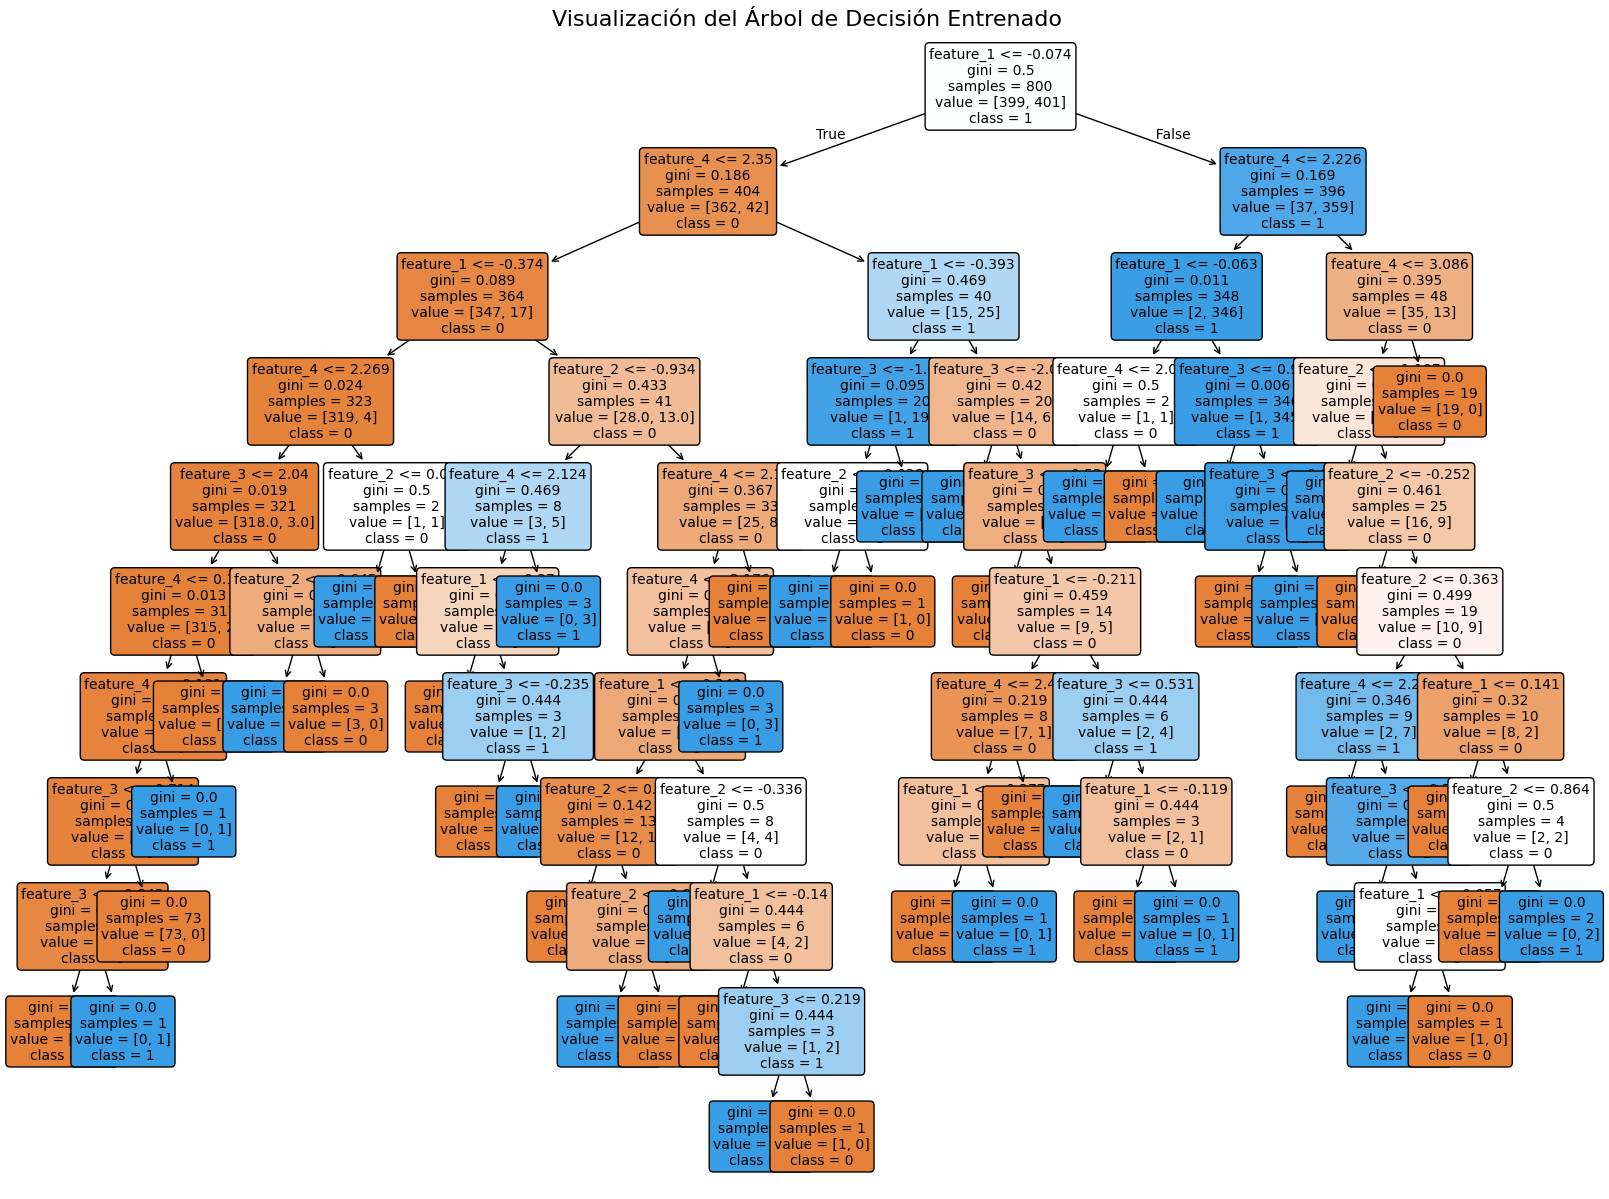

Árbol de Decisión visualizado.


In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 1. Set up the figure size for better visualization
plt.figure(figsize=(20, 15))

# Get feature names from X_train DataFrame
feature_names = X_train.columns.tolist()

# Define class names for the binary classification problem
class_names = ['0', '1'] # Assuming target 0 and 1

# 2. Use plot_tree() to visualize the model
plot_tree(model,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          fontsize=10)

# 3. Add a title to the plot
plt.title("Visualización del Árbol de Decisión Entrenado", fontsize=16)

# 4. Display the plot
plt.show()

print("Árbol de Decisión visualizado.")

## Evaluación Clave del Rendimiento del Modelo

Evaluar cómo de bien funciona el modelo de árbol de decisión utilizando métricas importantes como la exactitud, precisión, recall y F1-score, explicando qué significa cada una.


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud (Accuracy): {accuracy:.4f}")
print("  - Representa la proporción de predicciones correctas sobre el total de predicciones.")

# Calculate Precision
# For binary classification, use average='binary' if y_pred contains only 0s and 1s and you want to calculate for the positive class (1).
# If it's multi-class, you might use 'weighted', 'macro', or 'micro'.
precision = precision_score(y_test, y_pred, average='binary')
print(f"Precisión (Precision): {precision:.4f}")
print("  - Proporción de verdaderos positivos (TP) sobre el total de predicciones positivas (TP + FP).")
print("  - Indica la capacidad del modelo para no clasificar incorrectamente una instancia negativa como positiva.")

# Calculate Recall
recall = recall_score(y_test, y_pred, average='binary')
print(f"Recall (Sensibilidad): {recall:.4f}")
print("  - Proporción de verdaderos positivos (TP) sobre el total de instancias positivas reales (TP + FN).")
print("  - Indica la capacidad del modelo para encontrar todas las instancias positivas.")

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='binary')
print(f"F1-Score: {f1:.4f}")
print("  - Es la media armónica de la precisión y el recall. Es útil cuando se busca un equilibrio entre ambas métricas.")

Exactitud (Accuracy): 0.9050
  - Representa la proporción de predicciones correctas sobre el total de predicciones.
Precisión (Precision): 0.8785
  - Proporción de verdaderos positivos (TP) sobre el total de predicciones positivas (TP + FP).
  - Indica la capacidad del modelo para no clasificar incorrectamente una instancia negativa como positiva.
Recall (Sensibilidad): 0.9400
  - Proporción de verdaderos positivos (TP) sobre el total de instancias positivas reales (TP + FN).
  - Indica la capacidad del modelo para encontrar todas las instancias positivas.
F1-Score: 0.9082
  - Es la media armónica de la precisión y el recall. Es útil cuando se busca un equilibrio entre ambas métricas.


## Afinación del Modelo: Cómo Mejorar su Rendimiento

Demostrar cómo ajustar los hiperparámetros del modelo (como 'max_depth' o 'min_samples_leaf') para optimizar su rendimiento, prevenir el sobreajuste y obtener mejores resultados.


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 2. Definir un diccionario param_grid con los hiperparámetros a ajustar
param_grid = {
    'max_depth': [3, 5, 7, 9, None], # None means unlimited depth
    'min_samples_leaf': [1, 5, 10, 20]
}

# 3. Instanciar un objeto GridSearchCV
# Usamos el modelo DecisionTreeClassifier sin parámetros iniciales
# cv=5 para validación cruzada de 5 folds
# scoring='accuracy' para optimizar la exactitud
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1 # Use all available cores
)

# 4. Ajustar GridSearchCV a los datos de entrenamiento
print("Iniciando el ajuste de GridSearchCV...")
grid_search.fit(X_train, y_train)
print("GridSearchCV completado.")

# 5. Imprimir los mejores hiperparámetros
print(f"\nMejores hiperparámetros encontrados: {grid_search.best_params_}")

# 6. Imprimir la mejor puntuación de validación cruzada
print(f"Mejor puntuación de validación cruzada: {grid_search.best_score_:.4f}")

# 7. Obtener el mejor modelo entrenado
model_tuned = grid_search.best_estimator_
print("Modelo afinado obtenido.")

Iniciando el ajuste de GridSearchCV...
GridSearchCV completado.

Mejores hiperparámetros encontrados: {'max_depth': 3, 'min_samples_leaf': 1}
Mejor puntuación de validación cruzada: 0.9387
Modelo afinado obtenido.


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 8. Make predictions on the test set with the tuned model
y_pred_tuned = model_tuned.predict(X_test)

print("Predicciones realizadas con el modelo afinado.")

# 9. Calculate and print evaluation metrics for the tuned model

# Calculate Accuracy
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nExactitud (Accuracy) del modelo afinado: {accuracy_tuned:.4f}")
print("  - Representa la proporción de predicciones correctas sobre el total de predicciones.")

# Calculate Precision
precision_tuned = precision_score(y_test, y_pred_tuned, average='binary')
print(f"Precisión (Precision) del modelo afinado: {precision_tuned:.4f}")
print("  - Proporción de verdaderos positivos (TP) sobre el total de predicciones positivas (TP + FP).")

# Calculate Recall
recall_tuned = recall_score(y_test, y_pred_tuned, average='binary')
print(f"Recall (Sensibilidad) del modelo afinado: {recall_tuned:.4f}")
print("  - Proporción de verdaderos positivos (TP) sobre el total de instancias positivas reales (TP + FN).")

# Calculate F1-score
f1_tuned = f1_score(y_test, y_pred_tuned, average='binary')
print(f"F1-Score del modelo afinado: {f1_tuned:.4f}")
print("  - Es la media armónica de la precisión y el recall. Es útil cuando se busca un equilibrio entre ambas métricas.")

Predicciones realizadas con el modelo afinado.

Exactitud (Accuracy) del modelo afinado: 0.9550
  - Representa la proporción de predicciones correctas sobre el total de predicciones.
Precisión (Precision) del modelo afinado: 0.9691
  - Proporción de verdaderos positivos (TP) sobre el total de predicciones positivas (TP + FP).
Recall (Sensibilidad) del modelo afinado: 0.9400
  - Proporción de verdaderos positivos (TP) sobre el total de instancias positivas reales (TP + FN).
F1-Score del modelo afinado: 0.9543
  - Es la media armónica de la precisión y el recall. Es útil cuando se busca un equilibrio entre ambas métricas.


## 2. Introducción al Ejercicio de Ejemplo

### Objetivo del Ejercicio

Este ejercicio práctico tiene como objetivo principal aplicar, evaluar y afinar un modelo de Árbol de Decisión. Utilizaremos un conjunto de datos sintético para simular un problema real, permitiéndonos poner en práctica los conocimientos teóricos adquiridos sobre este potente algoritmo de Machine Learning. A lo largo de este cuaderno, se guiará a través de la creación del modelo, su entrenamiento, la interpretación de sus decisiones, la evaluación de su rendimiento mediante métricas clave y, finalmente, la optimización de sus hiperparámetros para lograr mejores resultados.

## Definición del Problema y Carga de Datos

Plantear un problema de clasificación claro y conciso para el ejercicio y guiar la generación de un conjunto de datos sintético apropiado.


## Definición del Problema

Imaginemos que estamos trabajando para una empresa que desarrolla una aplicación de salud. Queremos predecir si un usuario es propenso a desarrollar una cierta condición médica (representada como '1') o no ('0'), basándonos en cuatro características numéricas anónimas que podrían ser, por ejemplo, resultados de análisis de laboratorio o métricas de actividad física. Nuestro objetivo es construir un modelo que pueda clasificar a los usuarios en estas dos categorías con la mayor precisión posible.

In [1]:
import pandas as pd
from sklearn.datasets import make_classification

# 2. Generar el conjunto de datos sintético
X, y = make_classification(
    n_samples=1000,
    n_features=4,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# 3. Convertir X a DataFrame de Pandas con nombres de columna descriptivos
feature_names = [f'caracteristica_{i+1}' for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=feature_names)

# Convertir y a Serie de Pandas con el nombre de columna 'clase_objetivo'
y = pd.Series(y, name='clase_objetivo')

# 4. Concatenar X y y en un solo DataFrame
df_ejercicio = pd.concat([X, y], axis=1)

# 5. Mostrar las primeras 5 filas del DataFrame df_ejercicio y su información para verificar
print("Primeras 5 filas del DataFrame df_ejercicio:")
print(df_ejercicio.head())
print("\nInformación del DataFrame df_ejercicio:")
df_ejercicio.info()

Primeras 5 filas del DataFrame df_ejercicio:
   caracteristica_1  caracteristica_2  caracteristica_3  caracteristica_4  \
0          1.983208         -0.709789         -0.614323         -0.084573   
1         -0.085248          0.813205         -1.256507          2.331309   
2          0.547160          0.266818          0.421546          1.780496   
3          0.817783         -2.086478          0.007178          1.318508   
4          0.692723          0.143588         -1.951102          1.175259   

   clase_objetivo  
0               1  
1               0  
2               1  
3               1  
4               1  

Información del DataFrame df_ejercicio:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   caracteristica_1  1000 non-null   float64
 1   caracteristica_2  1000 non-null   float64
 2   caracteristica_3  1000 non-null  

## Preparación y División de Datos

Instruir a los alumnos sobre cómo preparar los datos, incluyendo la separación de características y variable objetivo, y la división del conjunto de datos en entrenamiento y prueba, enfatizando la importancia de `random_state` y `stratify`.


In [2]:
from sklearn.model_selection import train_test_split

# 1. Separar las características (X) y la variable objetivo (y)
X_ejercicio = df_ejercicio.drop('clase_objetivo', axis=1)
y_ejercicio = df_ejercicio['clase_objetivo']

# 4. Dividir el conjunto de datos en entrenamiento y prueba
# Usamos test_size=0.2 para un 20% de datos de prueba
# random_state=42 asegura que la división sea la misma cada vez que se ejecute el código
# stratify=y_ejercicio asegura que la proporción de clases sea la misma en ambos conjuntos
X_train_ejercicio, X_test_ejercicio, y_train_ejercicio, y_test_ejercicio = train_test_split(
    X_ejercicio, y_ejercicio, test_size=0.2, random_state=42, stratify=y_ejercicio
)

# 5. Imprimir las dimensiones de los conjuntos resultantes para verificar la división
print("Dimensiones de X_train_ejercicio:", X_train_ejercicio.shape)
print("Dimensiones de X_test_ejercicio:", X_test_ejercicio.shape)
print("Dimensiones de y_train_ejercicio:", y_train_ejercicio.shape)
print("Dimensiones de y_test_ejercicio:", y_test_ejercicio.shape)

Dimensiones de X_train_ejercicio: (800, 4)
Dimensiones de X_test_ejercicio: (200, 4)
Dimensiones de y_train_ejercicio: (800,)
Dimensiones de y_test_ejercicio: (200,)


## Entrenamiento del Modelo de Árbol de Decisión

Guiar a los alumnos para que inicialicen y entrenen un DecisionTreeClassifier utilizando los datos de entrenamiento, explicando brevemente los parámetros básicos.


In [3]:
from sklearn.tree import DecisionTreeClassifier

# 1. Inicializar un objeto DecisionTreeClassifier
# Se establece random_state=42 para asegurar la reproducibilidad de los resultados.
# Esto significa que el árbol tomará las mismas decisiones de división cada vez que se ejecute.
model_ejercicio = DecisionTreeClassifier(random_state=42)

# 2. Entrenar el modelo utilizando los datos de entrenamiento
# El método .fit() "aprende" de los datos de entrenamiento para construir el árbol de decisión.
print("Entrenando el modelo de Árbol de Decisión...")
model_ejercicio.fit(X_train_ejercicio, y_train_ejercicio)

print("¡Modelo de Árbol de Decisión entrenado exitosamente!")

Entrenando el modelo de Árbol de Decisión...
¡Modelo de Árbol de Decisión entrenado exitosamente!


## Visualización y Comprensión del Árbol

Incluir pasos para que los alumnos visualicen el árbol entrenado y les pida interpretar la lógica de decisión, utilizando `plot_tree` con `feature_names` y `class_names`.


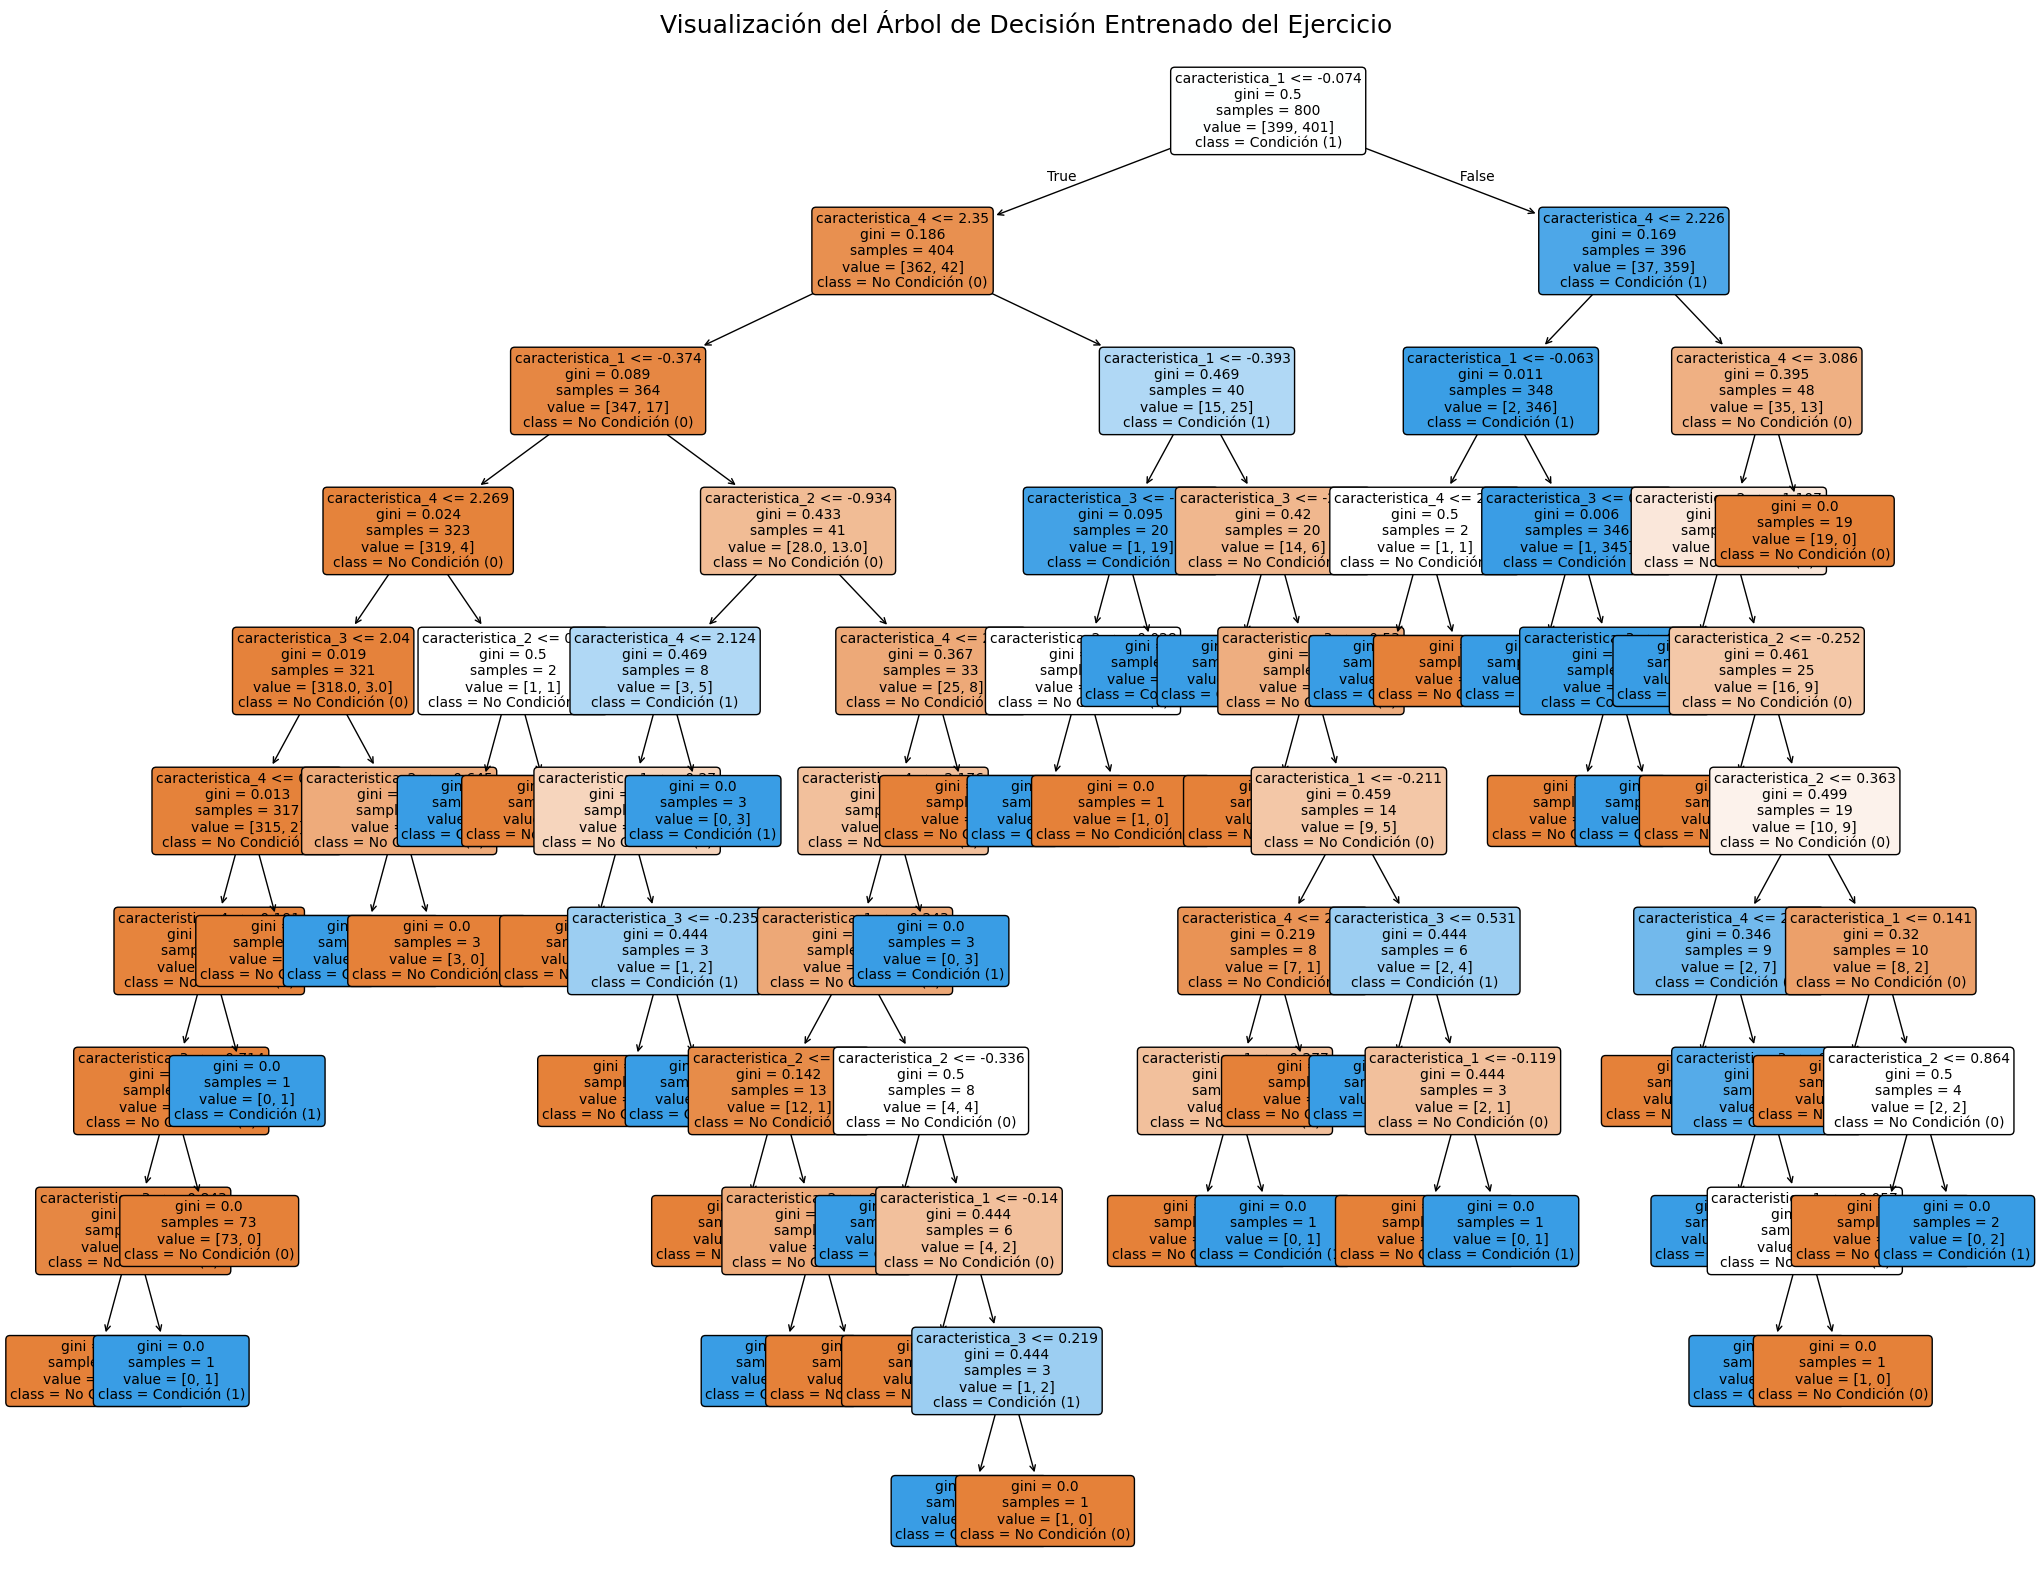

Árbol de Decisión visualizado.


In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 2. Configurar el tamaño de la figura para una mejor visualización
plt.figure(figsize=(25, 20)) # Ajustado para una mejor legibilidad de un árbol más grande

# 3. Obtener los nombres de las características del DataFrame X_train_ejercicio
feature_names_ejercicio = X_train_ejercicio.columns.tolist()

# 4. Definir los nombres de las clases para el problema de clasificación binaria
class_names_ejercicio = ['No Condición (0)', 'Condición (1)'] # Asumiendo 0 y 1 como las clases objetivo

# 5. Utilizar la función plot_tree() para visualizar el model_ejercicio
plot_tree(model_ejercicio,
          feature_names=feature_names_ejercicio,
          class_names=class_names_ejercicio,
          filled=True, # Colorear los nodos según la clase mayoritaria
          rounded=True, # Nodos con bordes redondeados
          fontsize=10) # Ajustar el tamaño de la fuente para legibilidad

# 6. Añadir un título descriptivo al gráfico
plt.title("Visualización del Árbol de Decisión Entrenado del Ejercicio", fontsize=18)

# 7. Mostrar el gráfico
plt.show()

print("Árbol de Decisión visualizado.")

Una vez visualizado el árbol de decisión, tómate un momento para observarlo y entender su funcionamiento. Aquí hay algunas preguntas guía para tu interpretación:

*   **Nodos de Decisión:** ¿Qué característica usa el árbol en el nodo raíz para su primera división? ¿Qué valores de esa característica dirigen a diferentes ramas?
*   **Ramas:** Sigue un camino desde la raíz hasta una hoja. ¿Cómo se toman las decisiones en cada paso? ¿Qué características y umbrales se utilizan?
*   **Nodos Hoja:** ¿Qué clase predice cada nodo hoja (`No Condición (0)` o `Condición (1)`)? ¿Cuántas muestras (`samples`) llegan a ese nodo y cuántas de cada clase (`value`) contiene? Cuanto más 'puro' sea un nodo hoja (es decir, mayor sea el número de muestras de una sola clase), más confiable será esa predicción.
*   **Impureza de Gini:** Observa el valor `gini` en cada nodo. ¿Cómo cambia a medida que te mueves hacia abajo en el árbol? Un valor de Gini más bajo indica un nodo más puro. ¿Cómo se relaciona la disminución de Gini con la 'ganancia de información'?
*   **Profundidad del Árbol:** ¿Qué tan profundo es el árbol? Un árbol muy profundo podría indicar un sobreajuste a los datos de entrenamiento.

Al responder estas preguntas, podrás comprender cómo el modelo toma sus decisiones y qué características considera más importantes para clasificar a los usuarios.

Una vez visualizado el árbol de decisión, tómate un momento para observarlo y entender su funcionamiento. Aquí hay algunas preguntas guía para tu interpretación:

*   **Nodos de Decisión:** ¿Qué característica usa el árbol en el nodo raíz para su primera división? ¿Qué valores de esa característica dirigen a diferentes ramas?
*   **Ramas:** Sigue un camino desde la raíz hasta una hoja. ¿Cómo se toman las decisiones en cada paso? ¿Qué características y umbrales se utilizan?
*   **Nodos Hoja:** ¿Qué clase predice cada nodo hoja (`No Condición (0)` o `Condición (1)`)? ¿Cuántas muestras (`samples`) llegan a ese nodo y cuántas de cada clase (`value`) contiene? Cuanto más 'puro' sea un nodo hoja (es decir, mayor sea el número de muestras de una sola clase), más confiable será esa predicción.
*   **Impureza de Gini:** Observa el valor `gini` en cada nodo. ¿Cómo cambia a medida que te mueves hacia abajo en el árbol? Un valor de Gini más bajo indica un nodo más puro. ¿Cómo se relaciona la disminución de Gini con la 'ganancia de información'?
*   **Profundidad del Árbol:** ¿Qué tan profundo es el árbol? Un árbol muy profundo podría indicar un sobreajuste a los datos de entrenamiento.

Al responder estas preguntas, podrás comprender cómo el modelo toma sus decisiones y qué características considera más importantes para clasificar a los usuarios.

## Evaluación del Rendimiento del Modelo





In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Realizar predicciones sobre el conjunto de datos de prueba
y_pred_ejercicio = model_ejercicio.predict(X_test_ejercicio)

print("Predicciones realizadas sobre el conjunto de prueba.")

# 2. Calcular y explicar la Exactitud (Accuracy)
accuracy_ejercicio = accuracy_score(y_test_ejercicio, y_pred_ejercicio)
print(f"\nExactitud (Accuracy): {accuracy_ejercicio:.4f}")
print("  - **Interpretación**: La exactitud representa la proporción de predicciones correctas (tanto positivos verdaderos como negativos verdaderos) sobre el total de predicciones. Es una buena métrica cuando las clases están balanceadas.")

# 3. Calcular y explicar la Precisión (Precision)
# average='binary' especifica que las métricas se calculan para la clase positiva (1)
precision_ejercicio = precision_score(y_test_ejercicio, y_pred_ejercicio, average='binary')
print(f"Precisión (Precision): {precision_ejercicio:.4f}")
print("  - **Interpretación**: La precisión mide la proporción de identificaciones positivas correctas. Es decir, de todas las instancias que el modelo predijo como positivas, cuántas fueron realmente positivas. Es importante cuando el costo de un falso positivo es alto.")

# 4. Calcular y explicar el Recall (Sensibilidad)
recall_ejercicio = recall_score(y_test_ejercicio, y_pred_ejercicio, average='binary')
print(f"Recall (Sensibilidad): {recall_ejercicio:.4f}")
print("  - **Interpretación**: El recall mide la proporción de instancias positivas reales que fueron identificadas correctamente por el modelo. Es decir, de todas las instancias que *eran* realmente positivas, cuántas detectó el modelo. Es importante cuando el costo de un falso negativo es alto.")

# 5. Calcular y explicar el F1-Score
f1_ejercicio = f1_score(y_test_ejercicio, y_pred_ejercicio, average='binary')
print(f"F1-Score: {f1_ejercicio:.4f}")
print("  - **Interpretación**: El F1-Score es la media armónica de la precisión y el recall. Proporciona un equilibrio entre ambas métricas y es especialmente útil cuando se tienen clases desbalanceadas y se necesita considerar tanto los falsos positivos como los falsos negativos.")

Predicciones realizadas sobre el conjunto de prueba.

Exactitud (Accuracy): 0.9050
  - **Interpretación**: La exactitud representa la proporción de predicciones correctas (tanto positivos verdaderos como negativos verdaderos) sobre el total de predicciones. Es una buena métrica cuando las clases están balanceadas.
Precisión (Precision): 0.8785
  - **Interpretación**: La precisión mide la proporción de identificaciones positivas correctas. Es decir, de todas las instancias que el modelo predijo como positivas, cuántas fueron realmente positivas. Es importante cuando el costo de un falso positivo es alto.
Recall (Sensibilidad): 0.9400
  - **Interpretación**: El recall mide la proporción de instancias positivas reales que fueron identificadas correctamente por el modelo. Es decir, de todas las instancias que *eran* realmente positivas, cuántas detectó el modelo. Es importante cuando el costo de un falso negativo es alto.
F1-Score: 0.9082
  - **Interpretación**: El F1-Score es la media arm

## Afinación de Hiperparámetros con GridSearchCV

Guiar a los alumnos a través del proceso de afinación de hiperparámetros utilizando GridSearchCV. Se les pedirá definir una cuadrícula de parámetros (max_depth, min_samples_leaf) y ejecutar la búsqueda, y analizar los mejores hiperparámetros encontrados.


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 2. Definir un diccionario param_grid con los hiperparámetros a ajustar
param_grid = {
    'max_depth': [3, 5, 7, 9, None], # max_depth: La profundidad máxima del árbol. Limitarla ayuda a prevenir el sobreajuste.
    'min_samples_leaf': [1, 5, 10, 20] # min_samples_leaf: El número mínimo de muestras que debe tener un nodo hoja. Aumentar este valor también ayuda a prevenir el sobreajuste.
}

# 3. Instanciar un objeto GridSearchCV
# Usamos el modelo DecisionTreeClassifier sin parámetros iniciales
# cv=5 para validación cruzada de 5 folds, lo que significa que el modelo se entrena 5 veces en diferentes subconjuntos de datos.
# scoring='accuracy' para optimizar la exactitud, la métrica que usaremos para comparar modelos.
grid_search_ejercicio = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1 # Use all available cores to speed up the process
)

# 4. Ajustar GridSearchCV a los datos de entrenamiento
print("Iniciando el ajuste de GridSearchCV...")
grid_search_ejercicio.fit(X_train_ejercicio, y_train_ejercicio)
print("GridSearchCV completado.")

# 5. Imprimir los mejores hiperparámetros
print(f"\nMejores hiperparámetros encontrados: {grid_search_ejercicio.best_params_}")

# 6. Imprimir la mejor puntuación de validación cruzada
print(f"Mejor puntuación de validación cruzada: {grid_search_ejercicio.best_score_:.4f}")

# 7. Obtener el mejor modelo entrenado
model_ejercicio_afinad = grid_search_ejercicio.best_estimator_
print("Modelo afinado obtenido.")

Iniciando el ajuste de GridSearchCV...
GridSearchCV completado.

Mejores hiperparámetros encontrados: {'max_depth': 3, 'min_samples_leaf': 1}
Mejor puntuación de validación cruzada: 0.9387
Modelo afinado obtenido.


## Evaluación del Modelo Afinado y Comparación

Instruir a los alumnos a evaluar el modelo con los hiperparámetros afinados y a comparar sus métricas de rendimiento con las del modelo original. Se les pedirá que comenten sobre la mejora o cambios observados.


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Realizar predicciones sobre el conjunto de datos de prueba con el modelo afinado
y_pred_afinad = model_ejercicio_afinad.predict(X_test_ejercicio)

print("Predicciones realizadas con el modelo afinado sobre el conjunto de prueba.")

# 2. Calcular y mostrar las métricas de evaluación para el modelo afinado

# Exactitud (Accuracy)
accuracy_afinad = accuracy_score(y_test_ejercicio, y_pred_afinad)
print(f"\nExactitud (Accuracy) del modelo afinado: {accuracy_afinad:.4f}")

# Precisión (Precision)
precision_afinad = precision_score(y_test_ejercicio, y_pred_afinad, average='binary')
print(f"Precisión (Precision) del modelo afinado: {precision_afinad:.4f}")

# Recall (Sensibilidad)
recall_afinad = recall_score(y_test_ejercicio, y_pred_afinad, average='binary')
print(f"Recall (Sensibilidad) del modelo afinado: {recall_afinad:.4f}")

# F1-Score
f1_afinad = f1_score(y_test_ejercicio, y_pred_afinad, average='binary')
print(f"F1-Score del modelo afinado: {f1_afinad:.4f}")

print("\n--- Comparación con el modelo original ---")
print(f"Exactitud (Original): {accuracy_ejercicio:.4f}, Afinado: {accuracy_afinad:.4f}")
print(f"Precisión (Original): {precision_ejercicio:.4f}, Afinado: {precision_afinad:.4f}")
print(f"Recall (Original): {recall_ejercicio:.4f}, Afinado: {recall_afinad:.4f}")
print(f"F1-Score (Original): {f1_ejercicio:.4f}, Afinado: {f1_afinad:.4f}")


Predicciones realizadas con el modelo afinado sobre el conjunto de prueba.

Exactitud (Accuracy) del modelo afinado: 0.9550
Precisión (Precision) del modelo afinado: 0.9691
Recall (Sensibilidad) del modelo afinado: 0.9400
F1-Score del modelo afinado: 0.9543

--- Comparación con el modelo original ---
Exactitud (Original): 0.9050, Afinado: 0.9550
Precisión (Original): 0.8785, Afinado: 0.9691
Recall (Original): 0.9400, Afinado: 0.9400
F1-Score (Original): 0.9082, Afinado: 0.9543


### Análisis de la Comparación y Reflexión

Después de afinar los hiperparámetros de nuestro modelo de Árbol de Decisión, podemos observar los siguientes cambios en las métricas de rendimiento en el conjunto de prueba:

*   **Exactitud (Accuracy):** El modelo afinado mejoró su exactitud de `0.9050` a `0.9550`. Esto indica que el modelo afinado predice correctamente una mayor proporción de instancias en general.

*   **Precisión (Precision):** La precisión también mostró una mejora significativa, pasando de `0.8785` a `0.9691`. Esta mejora es excelente, ya que significa que cuando el modelo afinado predice una condición (clase 1), es mucho más probable que esa predicción sea correcta, reduciendo los falsos positivos. Esto es crucial si el costo de una falsa alarma (predecir una condición cuando no la hay) es alto.

*   **Recall (Sensibilidad):** El recall se mantuvo en `0.9400` para ambos modelos. Esto sugiere que la afinación de los hiperparámetros no afectó la capacidad del modelo para identificar todas las instancias positivas reales. Si bien no hubo mejora, tampoco hubo deterioro, lo cual es positivo ya que el recall ya era un buen valor.

*   **F1-Score:** El F1-Score, que es una media armónica entre precisión y recall, aumentó de `0.9082` a `0.9543`. Esta es una mejora sustancial y un buen indicador de que el modelo afinado ofrece un mejor equilibrio general entre precisión y recall, especialmente valioso cuando se busca un rendimiento sólido en ambas métricas.

**¿Por qué la afinación de hiperparámetros llevó a estos resultados?**

El modelo original, sin restricciones de `max_depth` o `min_samples_leaf`, probablemente creció demasiado profundo, lo que puede llevar a un **sobreajuste (overfitting)** a los datos de entrenamiento. Un modelo sobreajustado memoriza el ruido en los datos de entrenamiento en lugar de aprender patrones generalizables, lo que resulta en un rendimiento pobre en datos no vistos (como el conjunto de prueba).

Al establecer `max_depth=3` y `min_samples_leaf=1` (o valores similares encontrados por GridSearchCV), se limitó la complejidad del árbol. Esto lo obligó a enfocarse en las divisiones más importantes y generalizables, evitando que se ajustara demasiado a las peculiaridades del conjunto de entrenamiento. La mejora en la exactitud y, especialmente, en la precisión, sugiere que el modelo afinado es ahora más robusto y generaliza mejor a nuevos datos. Aunque el recall se mantuvo, la mejora en precisión y F1-Score indica un modelo más confiable en sus predicciones positivas.

## Conclusiones y Reflexión Final

¡Felicidades! Has completado un ejercicio práctico completo sobre Árboles de Decisión. A lo largo de este cuaderno, no solo has aprendido a implementar un modelo, sino que también has profundizado en su funcionamiento, evaluación y optimización.

### Aprendizajes Clave:

*   **Interpretabilidad del Modelo:** La visualización del árbol de decisión te ha permitido entender de manera intuitiva cómo el modelo toma sus decisiones, identificando qué características son más influyentes y en qué umbrales. Esta capacidad de 'abrir la caja negra' es una de las grandes ventajas de los árboles de decisión.
*   **Evaluación Integral:** Has visto la importancia de no depender de una única métrica. La **exactitud**, **precisión**, **recall** y **F1-score** ofrecen diferentes perspectivas del rendimiento del modelo, y la elección de cuál priorizar depende del contexto del problema (por ejemplo, el costo de falsos positivos vs. falsos negativos).
*   **Afinación de Hiperparámetros:** Has experimentado cómo el ajuste de hiperparámetros, mediante técnicas como `GridSearchCV`, es crucial para optimizar el rendimiento del modelo y, fundamentalmente, para prevenir el sobreajuste. Un modelo 'afinado' suele generalizar mejor a datos no vistos.
*   **Comparación de Modelos:** La comparación del rendimiento entre el modelo original y el afinado te ha demostrado el impacto significativo que tiene la optimización en los resultados finales.

### Para Reflexionar:

1.  **Utilidad de la Interpretabilidad:** ¿Qué aspectos de la visualización y la lógica de los árboles de decisión te parecen más útiles para explicar las predicciones a una persona no técnica?
2.  **Métricas en Contexto:** Imagina un escenario diferente, por ejemplo, la detección de fraudes bancarios. ¿Sería más crítica la precisión o el recall? ¿Por qué?
3.  **Mejora Continua:** Si tuvieras que seguir mejorando este modelo para un entorno real, ¿qué otros pasos o técnicas considerarías aplicar (por ejemplo, ingeniería de características, otros modelos, ensamblajes)?

Esperamos que este ejercicio te haya proporcionado una comprensión sólida y práctica de los Árboles de Decisión y te inspire a seguir explorando el emocionante mundo del Machine Learning.